In [2]:
## import livb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter

print("Imports complete.")

Imports complete.


# TP04 - Problem 06

In [ ]:
## Download the dataset

# Import the ISLR package
ISLR = importr('datasets')  # == library(datasets) in R

# Load the Default dataset
ro.r['data']('warpbreaks', package='datasets') # == data("warpbreaks") in R

with localconverter(ro.default_converter + pandas2ri.converter):
    warpbreaks_df = ro.r['warpbreaks']

# Display the first few rows of the dataset
print("Dataset loaded.")
print(warpbreaks_df.head())

# dave in csv
warpbreaks_df.to_csv('warpbreaks.csv', index=False)

In [7]:
## get data
warpbreaks_df = pd.read_csv('warpbreaks.csv')
warpbreaks_df.head()

,breaks,wool,tension
0,26.0,A,L
1,30.0,A,L
2,54.0,A,L
3,25.0,A,L
4,70.0,A,L


The data set looks at how many warp breaks occurred for different types of looms per loom, per fixed length of yarn.

## Let's get to know the data like we did to her.

### The Real-World Story Behind the Data
Imagine you're running a textile factory in the 1950s. Your weaving machines keep breaking threads ("warp breaks"), causing:

- **Production delays** (stopping machines to fix breaks)

- **Wasted material** (yarn that can't be used)

- **Poor quality fabric** (breaks create defects)

You have two suppliers for your wool (Types A and B) and you can adjust machine tension (**L**ow, **M**edium, **H**igh). You want to know for example:

**1. Which wool breaks less?**

**2. What tension works best?**

**3. Does the best tension depend on the wool type?**

That's it.

**Column descriptions:**

- **breaks**: the number of breaks

- **wool**: the type of wool (A or B)

- **tension**: the level of tension (L, M, H)

## a. We are interested in modelling breaks on other variables. Do EDA on the dataset.

### UNIVARIATE ANALYSIS

#### Response Variable

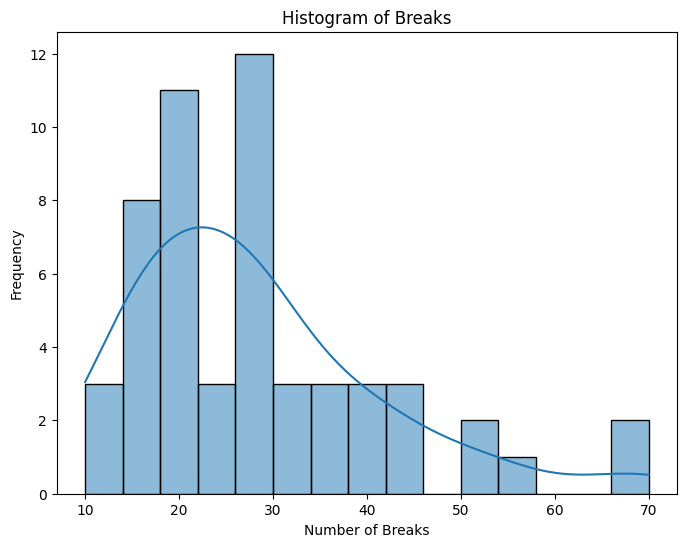

In [10]:
# histrogram of breaks
plt.figure(figsize=(8, 6))
sns.histplot(warpbreaks_df['breaks'], bins=15, kde=True)
plt.title("Histogram of Breaks")
plt.xlabel("Number of Breaks")
plt.ylabel("Frequency")
plt.show()

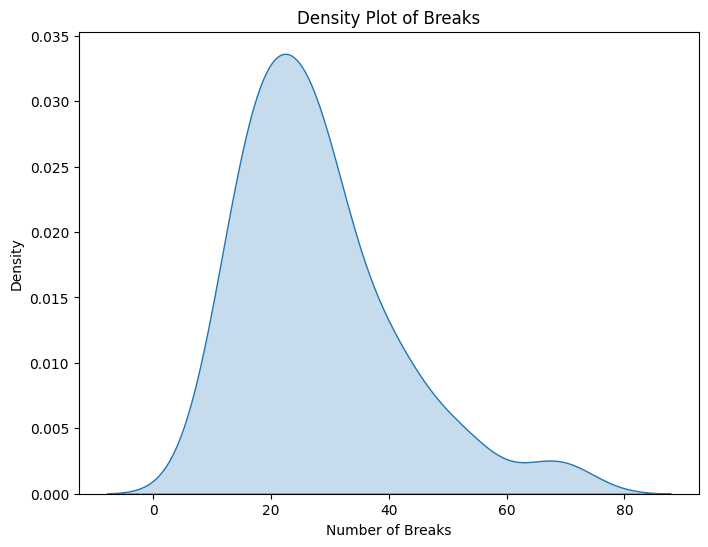

In [12]:
# density plot of breaks
plt.figure(figsize=(8, 6))
sns.kdeplot(warpbreaks_df['breaks'], fill=True)
plt.title("Density Plot of Breaks")
plt.xlabel("Number of Breaks")
plt.ylabel("Density")
plt.show()

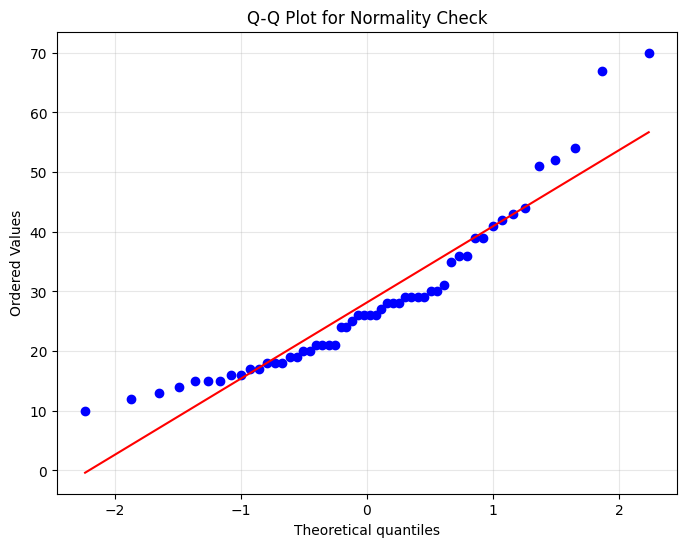

In [25]:
#  Q-Q plot for normality
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(warpbreaks_df['breaks'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Check')
plt.grid(True, alpha=0.3)
plt.show()

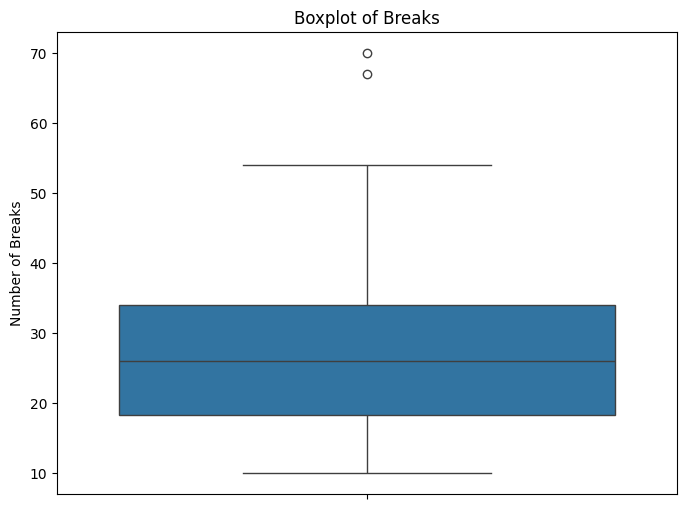

In [9]:
# box polot of breaks (response variable)
plt.figure(figsize=(8, 6))
sns.boxplot(y='breaks', data=warpbreaks_df)
plt.title("Boxplot of Breaks")
plt.ylabel("Number of Breaks")
plt.show()

#### Factor Variables

C:\Users\USer\AppData\Local\Temp\ipykernel_9120\3755450497.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wool_counts.index, y=wool_counts.values, palette='viridis', legend=False)


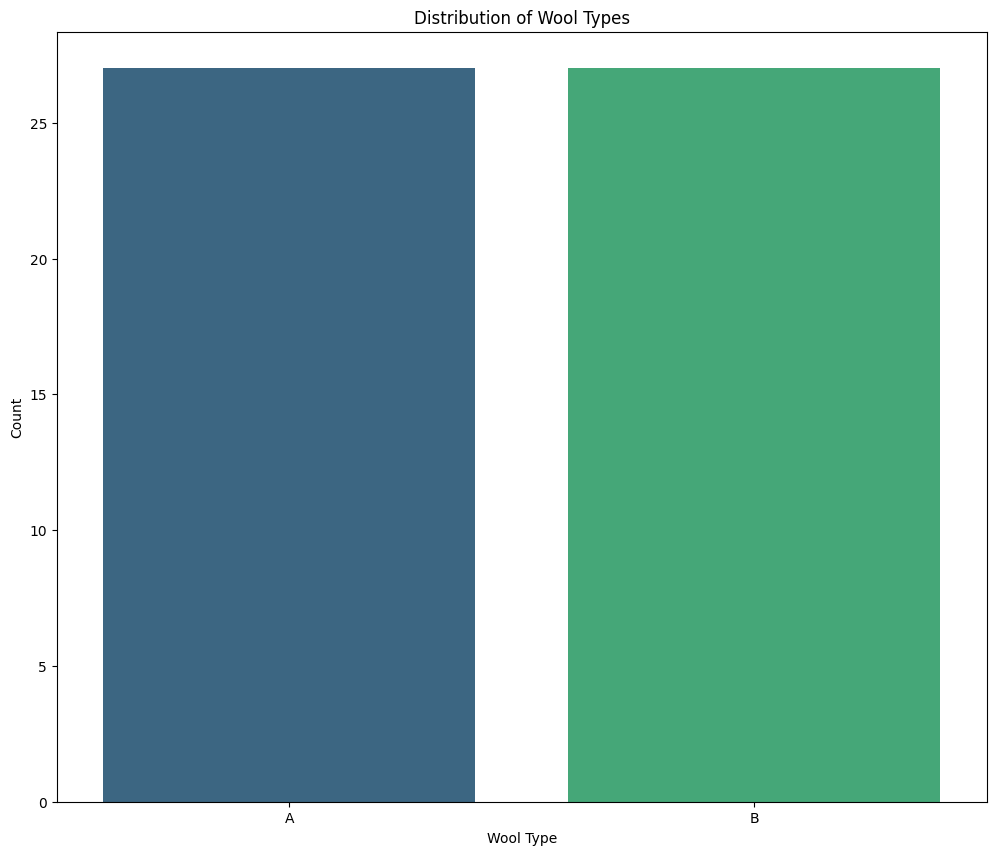

In [ ]:
# univariate analysis - wool
fig = plt.figure(figsize=(12, 10))

wool_counts = warpbreaks_df['wool'].value_counts()
sns.barplot(x=wool_counts.index, y=wool_counts.values, palette='viridis', legend=False)
plt.xlabel('Wool Type')
plt.ylabel('Count')
plt.title('Distribution of Wool Types')
plt.show()

C:\Users\USer\AppData\Local\Temp\ipykernel_9120\2152979903.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tension_counts.index, y=tension_counts.values, palette=colors)


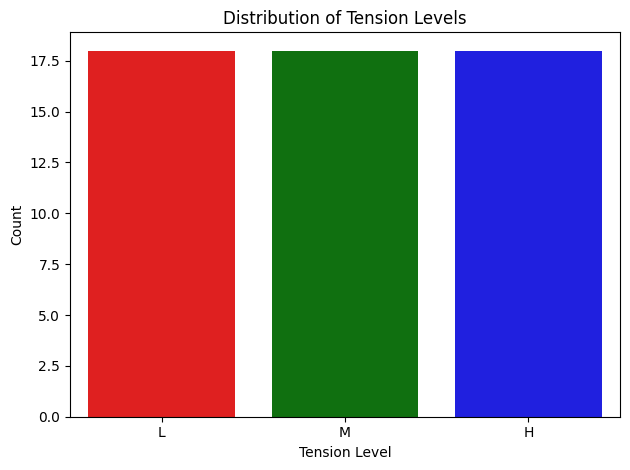

In [24]:
# Bar plot of tension levels
tension_counts = warpbreaks_df['tension'].value_counts()
colors = ['red', 'green', 'blue']
sns.barplot(x=tension_counts.index, y=tension_counts.values, palette=colors)
plt.xlabel('Tension Level')
plt.ylabel('Count')
plt.title('Distribution of Tension Levels')
plt.tight_layout()
plt.show()

In [26]:
# Normality test
from scipy.stats import shapiro

print("Normality Test (Shapiro-Wilk):")
stat, p_value = shapiro(warpbreaks_df['breaks'])
print(f"Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value > 0.05:
    print("Conclusion: Data appears normally distributed (fail to reject H0)")
else:
    print("Conclusion: Data does not appear normally distributed (reject H0)")

Normality Test (Shapiro-Wilk):
Test Statistic: 0.8925
P-value: 0.0002
Conclusion: Data does not appear normally distributed (reject H0)


### Bivariate Analysis

#### Wool

<Figure size 800x600 with 0 Axes>

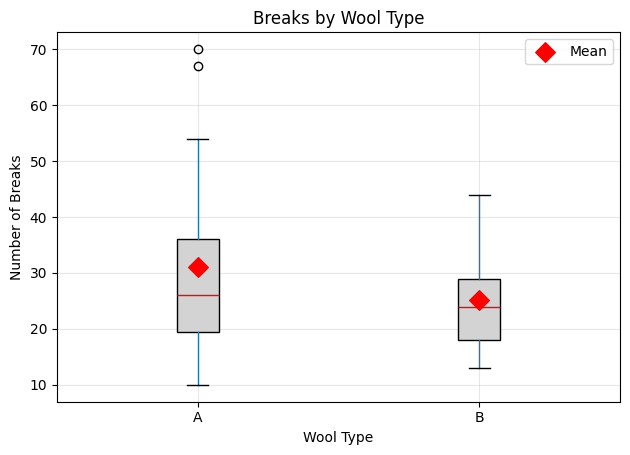

In [40]:
# breaks by wool type
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for breaks by wool type
plt.figure(figsize=(8, 6))
warpbreaks_df.boxplot(column='breaks', by='wool', 
           patch_artist=True,
           boxprops=dict(facecolor='lightgray'),
           medianprops=dict(color='red'))
plt.xlabel('Wool Type')
plt.ylabel('Number of Breaks')
plt.title('Breaks by Wool Type')
plt.suptitle('')  # Remove default title
plt.grid(True, alpha=0.3)

# Add mean points
wool_means = warpbreaks_df.groupby('wool')['breaks'].mean()
for i, wool in enumerate(['A', 'B']):
    plt.scatter(i+1, wool_means[wool], color='red', 
                s=100, marker='D', label='Mean' if i == 0 else "", zorder=2)

plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USer\AppData\Local\Temp\ipykernel_9120\4196073335.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='wool', y='breaks', data=warpbreaks_df, palette=['pink', 'lightblue'])
C:\Users\USer\AppData\Local\Temp\ipykernel_9120\4196073335.py:9: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\Schools\ITC\Year 4\statistical-modeling-tp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


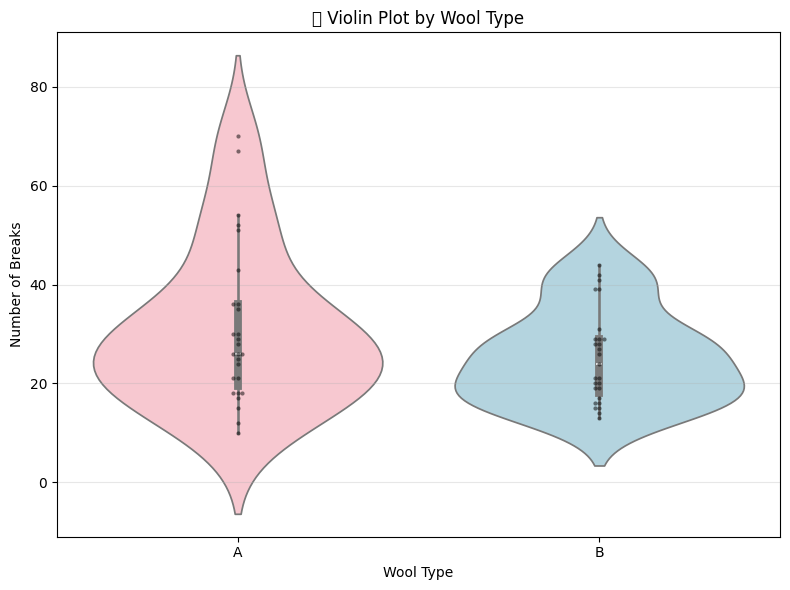

In [32]:
# Violin plot for breaks by wool type
plt.figure(figsize=(8, 6))
sns.violinplot(x='wool', y='breaks', data=warpbreaks_df, palette=['pink', 'lightblue'])
sns.swarmplot(x='wool', y='breaks', data=warpbreaks_df, color='black', alpha=0.5, size=3)
plt.xlabel('Wool Type')
plt.ylabel('Number of Breaks')
plt.title('🎻 Violin Plot by Wool Type')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [34]:
# Summary statistics
print("\nSummary Statistics by Wool Type:")
wool_stats = warpbreaks_df.groupby('wool')['breaks'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])
# wool_stats['CV (%)'] = (wool_stats['std'] / wool_stats['mean']) * 100
display(wool_stats.round(2))


Summary Statistics by Wool Type:


,count,mean,std,median,min,max
wool,,,,,,
A,27,31.04,15.85,26.0,10.0,70.0
B,27,25.26,9.30,24.0,13.0,44.0


#### Tesion

<Figure size 800x600 with 0 Axes>

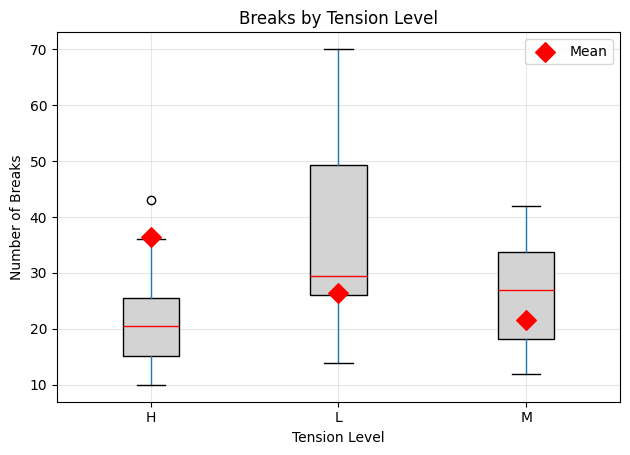

In [39]:
#Boxplot for Breaks by Tension Level
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for breaks by tension level
plt.figure(figsize=(8, 6))
warpbreaks_df.boxplot(column='breaks', by='tension', 
           patch_artist=True,
           boxprops=dict(facecolor='lightgray'),
           medianprops=dict(color='red'))
plt.xlabel('Tension Level')
plt.ylabel('Number of Breaks')
plt.title('Breaks by Tension Level')
plt.suptitle('')  # Remove default title
plt.grid(True, alpha=0.3)

# Add mean points
tension_means = warpbreaks_df.groupby('tension')['breaks'].mean()
for i, tension in enumerate(['L', 'M', 'H']):
    plt.scatter(i+1, tension_means[tension], color='red', 
                s=100, marker='D', label='Mean' if i == 0 else "", zorder=2)

plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USer\AppData\Local\Temp\ipykernel_9120\1528162189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='tension', y='breaks', data=warpbreaks_df, palette=['lightgreen', 'lightyellow', 'lightcoral'])


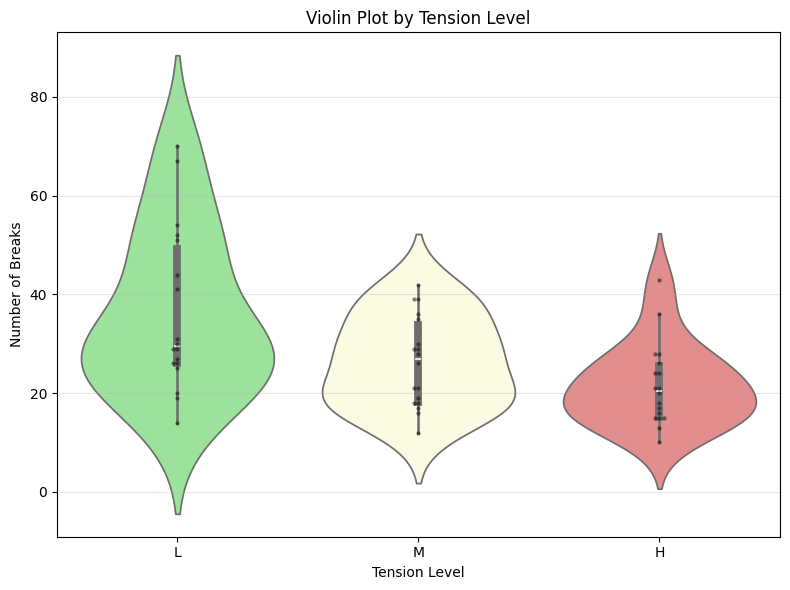

In [37]:
# Violin Plot for Breaks by Tension Level
# Violin plot for breaks by tension level
plt.figure(figsize=(8, 6))
sns.violinplot(x='tension', y='breaks', data=warpbreaks_df, palette=['lightgreen', 'lightyellow', 'lightcoral'])
sns.swarmplot(x='tension', y='breaks', data=warpbreaks_df, color='black', alpha=0.5, size=3)
plt.xlabel('Tension Level')
plt.ylabel('Number of Breaks')
plt.title('Violin Plot by Tension Level')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [38]:
# Summary statistics
print("\nSummary Statistics by Tension Level:")
tension_stats = warpbreaks_df.groupby('tension')['breaks'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])
# tension_stats['CV (%)'] = (tension_stats['std'] / tension_stats['mean']) * 100
display(tension_stats.round(2))


Summary Statistics by Tension Level:


,count,mean,std,median,min,max
tension,,,,,,
H,18,21.67,8.35,20.5,10.0,43.0
L,18,36.39,16.45,29.5,14.0,70.0
M,18,26.39,9.12,27.0,12.0,42.0


## b. Modelling breaks and obtain the best model. Is there any sign of overdispersion? If so, account for it. Interpret the coefficient estimates

BREAKS DISTRIBUTION ANALYSIS
Mean breaks: 28.15
Variance: 174.20
Mean/Variance ratio: 6.19


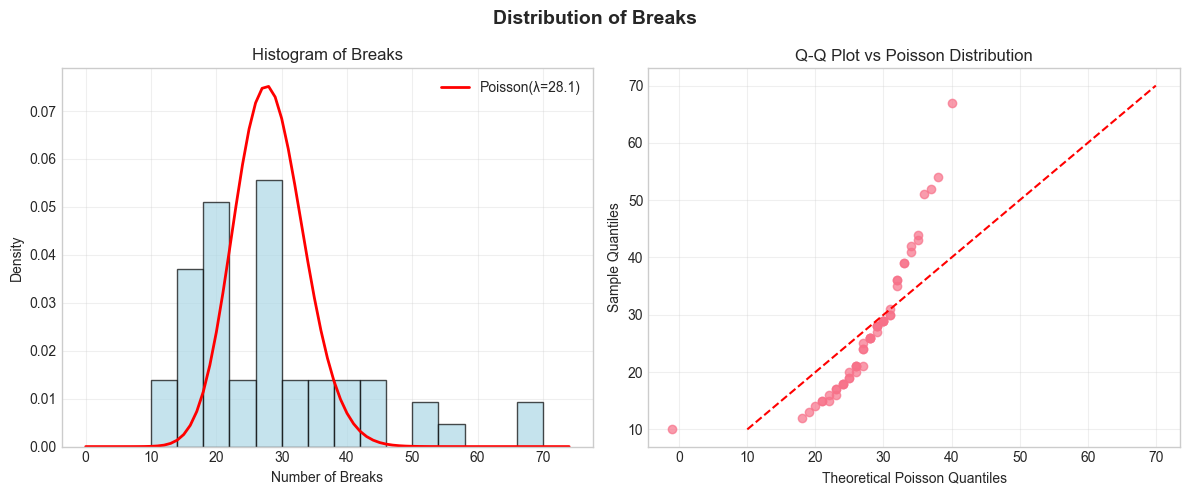

In [41]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson, NegativeBinomial
from statsmodels.tools.eval_measures import aic, bic
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load data
df = warpbreaks_df.copy()

# Check the distribution of breaks
print("="*60)
print("BREAKS DISTRIBUTION ANALYSIS")
print("="*60)
print(f"Mean breaks: {df['breaks'].mean():.2f}")
print(f"Variance: {df['breaks'].var():.2f}")
print(f"Mean/Variance ratio: {df['breaks'].var()/df['breaks'].mean():.2f}")

# Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Distribution of Breaks', fontsize=14, fontweight='bold')

# Histogram with Poisson fit
axes[0].hist(df['breaks'], bins=15, density=True, alpha=0.7, color='lightblue', edgecolor='black')
axes[0].set_xlabel('Number of Breaks')
axes[0].set_ylabel('Density')
axes[0].set_title('Histogram of Breaks')

# Overlay Poisson distribution
mean_breaks = df['breaks'].mean()
x = np.arange(0, df['breaks'].max() + 5)
poisson_pmf = stats.poisson.pmf(x, mean_breaks)
axes[0].plot(x, poisson_pmf, 'r-', linewidth=2, label=f'Poisson(λ={mean_breaks:.1f})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# QQ plot for Poisson
axes[1].scatter(np.sort(stats.poisson.ppf(np.linspace(0, 1, len(df)), mean_breaks)), 
                np.sort(df['breaks']), alpha=0.7)
axes[1].plot([df['breaks'].min(), df['breaks'].max()], 
             [df['breaks'].min(), df['breaks'].max()], 'r--')
axes[1].set_xlabel('Theoretical Poisson Quantiles')
axes[1].set_ylabel('Sample Quantiles')
axes[1].set_title('Q-Q Plot vs Poisson Distribution')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Preliminary Models - Check for Overdispersion


1. Mean vs Variance Analysis:
   Mean of breaks: 28.15
   Variance of breaks: 174.20
   Variance/Mean ratio: 6.19

2. Formal Overdispersion Tests:
   Pearson chi²/dof: 3.7639
STRONG evidence of overdispersion

3. Likelihood Ratio Test for Negative Binomial vs Poisson:
   Poisson AIC: 468.97
   Negative Binomial AIC: 478.57
Poisson may be adequate


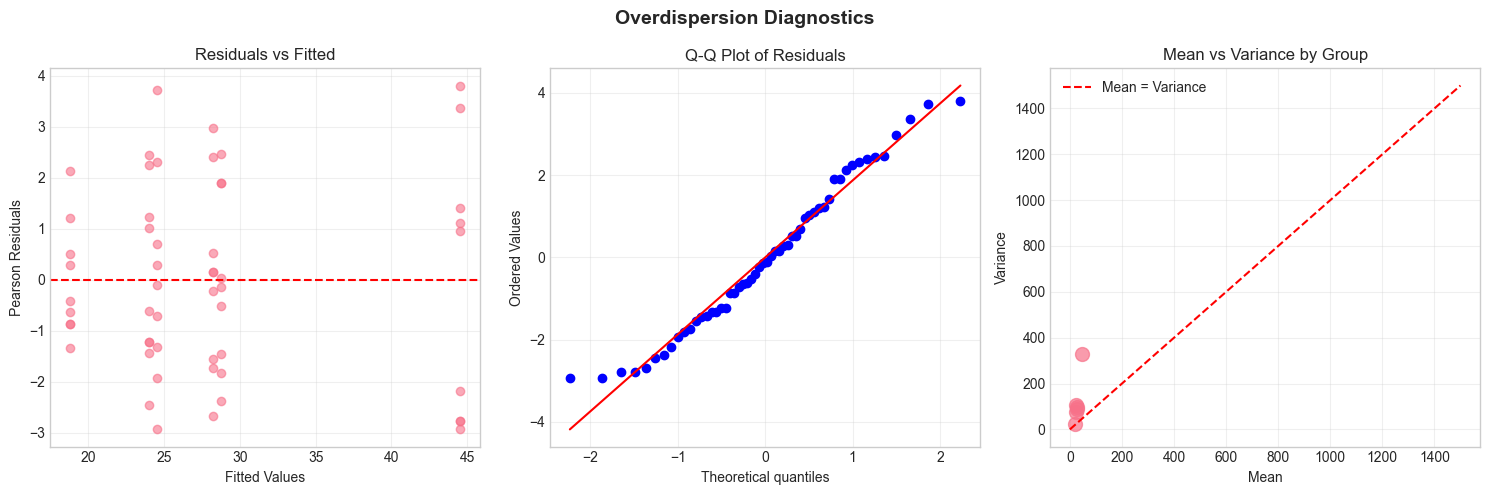

In [ ]:
# Overdispersion Diagnostics
# 1. Basic diagnostic: Mean vs Variance
print("\n1. Mean vs Variance Analysis:")
print(f"Mean of breaks: {df['breaks'].mean():.2f}")
print(f"Variance of breaks: {df['breaks'].var():.2f}")
print(f"Variance/Mean ratio: {df['breaks'].var()/df['breaks'].mean():.2f}")

# 2. Formal overdispersion tests
print("\n2. Formal Overdispersion Tests:")

# Fit Poisson model first
poisson_model = smf.glm('breaks ~ wool + tension + wool:tension', 
                       data=df, 
                       family=sm.families.Poisson()).fit()

# Test for overdispersion using Pearson chi-square
pearson_chi2 = sum((df['breaks'] - poisson_model.fittedvalues)**2 / poisson_model.fittedvalues)
df_resid = len(df) - poisson_model.df_model - 1
overdispersion_stat = pearson_chi2 / df_resid

print(f"Pearson chi²/dof: {overdispersion_stat:.4f}")
if overdispersion_stat > 1.5:
    print("STRONG evidence of overdispersion")
elif overdispersion_stat > 1.2:
    print("Moderate evidence of overdispersion")
else:
    print("No significant overdispersion detected")

# Likelihood ratio test for overdispersion
print("\n3. Likelihood Ratio Test for Negative Binomial vs Poisson:")

# Fit Negative Binomial model
nb_model = smf.glm('breaks ~ wool + tension + wool:tension', 
                  data=df, 
                  family=sm.families.NegativeBinomial()).fit()

# Compare models
print(f"Poisson AIC: {poisson_model.aic:.2f}")
print(f"Negative Binomial AIC: {nb_model.aic:.2f}")

if nb_model.aic < poisson_model.aic:
    print("Negative Binomial is better (suggests overdispersion)")
else:
    print("Poisson may be adequate")

# 4. Visual check for overdispersion
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Overdispersion Diagnostics', fontsize=14, fontweight='bold')

# Residuals vs Fitted
axes[0].scatter(poisson_model.fittedvalues, poisson_model.resid_pearson, alpha=0.6)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Pearson Residuals')
axes[0].set_title('Residuals vs Fitted')
axes[0].grid(alpha=0.3)

# Standardized residuals Q-Q plot
stats.probplot(poisson_model.resid_pearson, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')
axes[1].grid(alpha=0.3)

# Mean vs Variance by group
group_stats = df.groupby(['wool', 'tension'])['breaks'].agg(['mean', 'var']).reset_index()
axes[2].scatter(group_stats['mean'], group_stats['var'], alpha=0.7, s=100)
# Add equality line
max_val = max(group_stats[['mean', 'var']].max().max(), 1500)
axes[2].plot([0, max_val], [0, max_val], 'r--', label='Mean = Variance')
axes[2].set_xlabel('Mean')
axes[2].set_ylabel('Variance')
axes[2].set_title('Mean vs Variance by Group')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Fit Multiple Models

In [ ]:
# Fit Multiple Models
# Create interaction variable for some models
df['wool_tension'] = df['wool'] + '_' + df['tension']

# Define formulas for different models
formulas = {
    'Poisson_Null': 'breaks ~ 1',
    'Poisson_Wool': 'breaks ~ wool',
    'Poisson_Tension': 'breaks ~ tension',
    'Poisson_Additive': 'breaks ~ wool + tension',
    'Poisson_Full': 'breaks ~ wool * tension',
    
    'NB_Null': 'breaks ~ 1',
    'NB_Wool': 'breaks ~ wool',
    'NB_Tension': 'breaks ~ tension',
    'NB_Additive': 'breaks ~ wool + tension',
    'NB_Full': 'breaks ~ wool * tension',
    
    'QLM_Null': 'breaks ~ 1',
    'QLM_Wool': 'breaks ~ wool',
    'QLM_Tension': 'breaks ~ tension',
    'QLM_Additive': 'breaks ~ wool + tension',
    'QLM_Full': 'breaks ~ wool * tension'
}

models = {}
results = []

# Fit all models
for name, formula in formulas.items():
    try:
        if name.startswith('Poisson'):
            model = smf.glm(formula, data=df, family=sm.families.Poisson()).fit()
        elif name.startswith('NB'):
            model = smf.glm(formula, data=df, family=sm.families.NegativeBinomial()).fit()
        else:  # QLM (Quasi-Poisson)
            model = smf.glm(formula, data=df, family=sm.families.Poisson()).fit()
            # Calculate quasi-likelihood adjustments
            pearson_chi2 = sum((df['breaks'] - model.fittedvalues)**2 / model.fittedvalues)
            scale = pearson_chi2 / model.df_resid
            
        models[name] = model
        
        # Store results
        results.append({
            'Model': name,
            'AIC': model.aic if hasattr(model, 'aic') else np.nan,
            'BIC': model.bic if hasattr(model, 'bic') else np.nan,
            'Log-Likelihood': model.llf if hasattr(model, 'llf') else np.nan,
            'Deviance': model.deviance if hasattr(model, 'deviance') else np.nan,
            'DF_Resid': model.df_resid if hasattr(model, 'df_resid') else np.nan,
            'Scale': scale if 'scale' in locals() else 1.0
        })
        
        print(f"{name}: AIC = {model.aic:.2f}" if hasattr(model, 'aic') else f"{name}")
        
    except Exception as e:
        print(f"Error fitting {name}: {str(e)[:50]}...")

# Create results dataframe
results_df = pd.DataFrame(results).set_index('Model')
print("\nModel Comparison:")
display(results_df.sort_values('AIC').head(10))

Poisson_Null: AIC = 574.04
Poisson_Wool: AIC = 560.00
Poisson_Tension: AIC = 507.09
Poisson_Additive: AIC = 493.06
Poisson_Full: AIC = 468.97
NB_Null: AIC = 472.34
NB_Wool: AIC = 473.79
NB_Tension: AIC = 473.93
NB_Additive: AIC = 475.50
NB_Full: AIC = 478.57
QLM_Null: AIC = 574.04
QLM_Wool: AIC = 560.00
QLM_Tension: AIC = 507.09
QLM_Additive: AIC = 493.06
QLM_Full: AIC = 468.97

Model Comparison:


,AIC,BIC,Log-Likelihood,Deviance,DF_Resid,Scale
Model,,,,,,
Poisson_Full,468.969209,-9.166103,-228.484604,182.305131,48,3.763881
QLM_Full,468.969209,-9.166103,-228.484604,182.305131,48,3.763881
NB_Null,472.344107,-201.412537,-235.172054,10.003617,53,3.763881
NB_Wool,473.792012,-197.975648,-234.896006,9.451522,52,3.763881
NB_Tension,473.929445,-195.849232,-233.964722,7.588954,51,3.763881
NB_Additive,475.504462,-192.285231,-233.752231,7.163972,50,3.763881
NB_Full,478.573506,-185.238219,-233.286753,6.233016,48,3.763881
Poisson_Additive,493.055966,10.942686,-242.527983,210.391889,50,3.763881
QLM_Additive,493.055966,10.942686,-242.527983,210.391889,50,4.261522


### Model Comparison


 Best Models in Each Family:
Poisson: Poisson_Full
  AIC: 468.97
  BIC: -9.17
  Deviance: 182.31

Negative Binomial: NB_Null
  AIC: 472.34
  BIC: -201.41
  Deviance: 10.00

 Likelihood Ratio Tests:

1. Poisson Model Comparisons:
   Full vs Additive: LR = 28.09, df = 2, p = 0.0000

2. Poisson vs Negative Binomial:
   ΔAIC (NB - Poisson): 3.37
 Poisson is preferred (AIC lower)


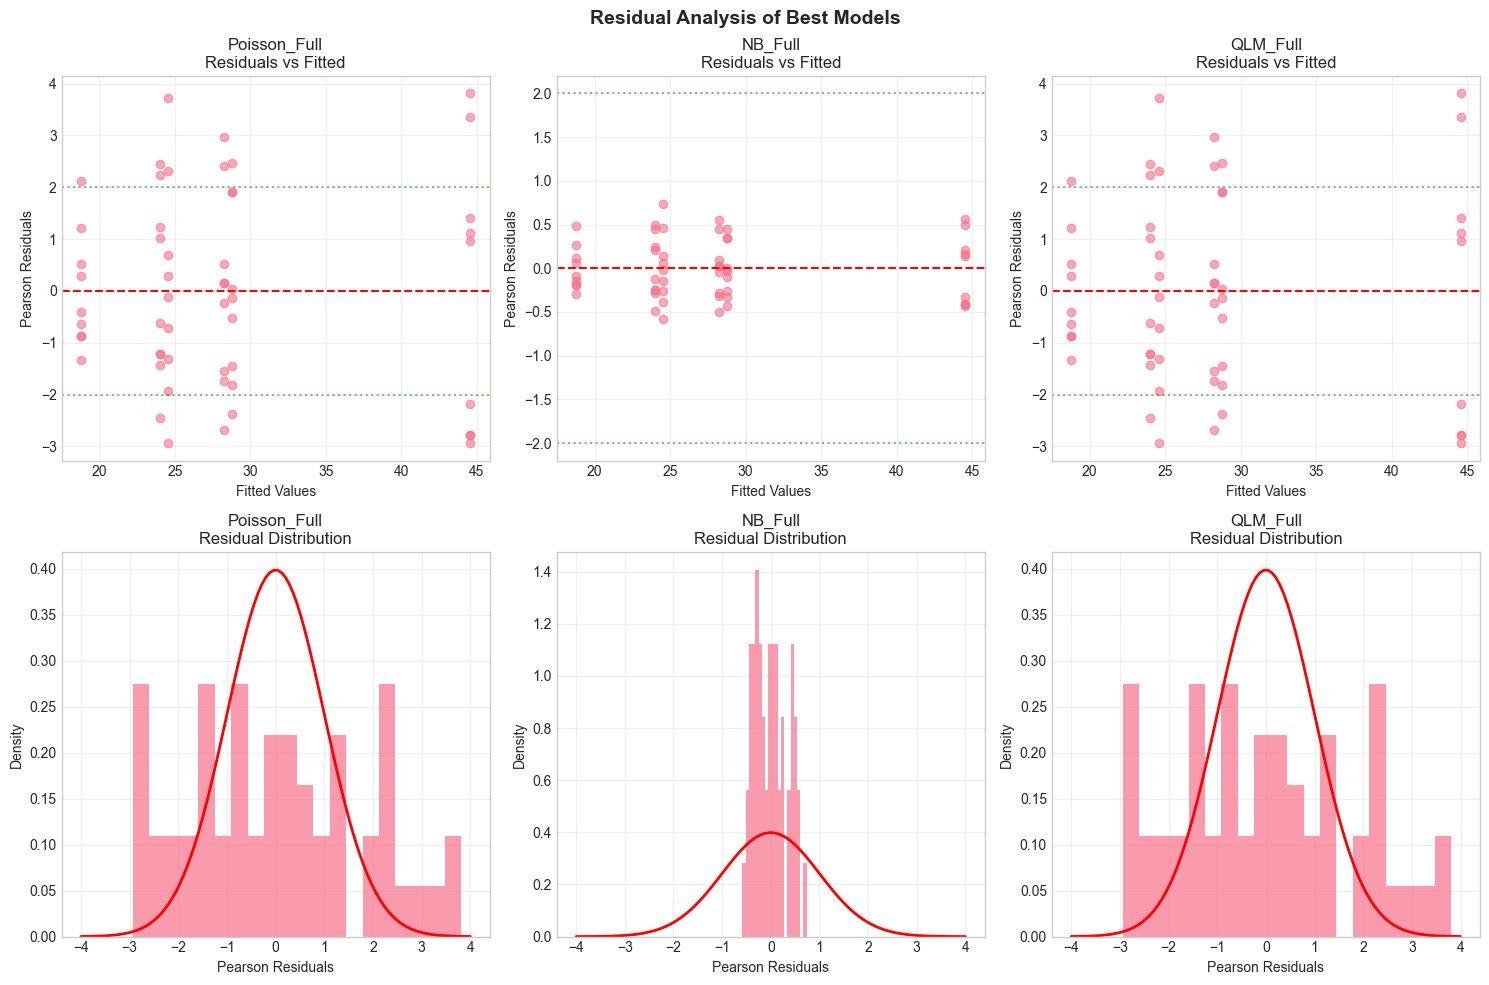

In [45]:
# model comparison between Poisson and Negative Binomial
# Identify best model from each family
best_poisson = results_df[results_df.index.str.startswith('Poisson')].sort_values('AIC').iloc[0]
best_nb = results_df[results_df.index.str.startswith('NB')].sort_values('AIC').iloc[0]

print("\n Best Models in Each Family:")
print(f"Poisson: {best_poisson.name}")
print(f"  AIC: {best_poisson['AIC']:.2f}")
print(f"  BIC: {best_poisson['BIC']:.2f}")
print(f"  Deviance: {best_poisson['Deviance']:.2f}")

print(f"\nNegative Binomial: {best_nb.name}")
print(f"  AIC: {best_nb['AIC']:.2f}")
print(f"  BIC: {best_nb['BIC']:.2f}")
print(f"  Deviance: {best_nb['Deviance']:.2f}")

# Likelihood ratio tests
print("\n Likelihood Ratio Tests:")

# Compare nested models within Poisson family
print("\n1. Poisson Model Comparisons:")
if 'Poisson_Full' in models and 'Poisson_Additive' in models:
    lrt_stat = 2 * (models['Poisson_Full'].llf - models['Poisson_Additive'].llf)
    lrt_df = models['Poisson_Additive'].df_resid - models['Poisson_Full'].df_resid
    lrt_p = stats.chi2.sf(lrt_stat, lrt_df)
    print(f"   Full vs Additive: LR = {lrt_stat:.2f}, df = {lrt_df}, p = {lrt_p:.4f}")

# Compare Poisson vs Negative Binomial
print("\n2. Poisson vs Negative Binomial:")
if 'Poisson_Full' in models and 'NB_Full' in models:
    # Note: These aren't nested, but we can compare AIC
    print(f"   ΔAIC (NB - Poisson): {best_nb['AIC'] - best_poisson['AIC']:.2f}")
    if best_nb['AIC'] < best_poisson['AIC']:
        print(" Negative Binomial is preferred (AIC lower)")
    else:
        print(" Poisson is preferred (AIC lower)")

# Residual analysis for best models
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Residual Analysis of Best Models', fontsize=14, fontweight='bold')

best_models_to_plot = {
    'Poisson_Full': models.get('Poisson_Full'),
    'NB_Full': models.get('NB_Full'),
    'QLM_Full': models.get('QLM_Full')
}

for idx, (name, model) in enumerate(best_models_to_plot.items()):
    if model is None:
        continue
    
    row = idx // 3
    col = idx % 3
    
    # Pearson residuals
    if hasattr(model, 'resid_pearson'):
        axes[row, col].scatter(model.fittedvalues, model.resid_pearson, alpha=0.6)
        axes[row, col].axhline(y=0, color='r', linestyle='--')
        axes[row, col].set_xlabel('Fitted Values')
        axes[row, col].set_ylabel('Pearson Residuals')
        axes[row, col].set_title(f'{name}\nResiduals vs Fitted')
        axes[row, col].grid(alpha=0.3)
        
        # Add lines at ±2 for overdispersion check
        axes[row, col].axhline(y=2, color='g', linestyle=':', alpha=0.5)
        axes[row, col].axhline(y=-2, color='g', linestyle=':', alpha=0.5)

# Distribution of residuals
for idx, (name, model) in enumerate(best_models_to_plot.items()):
    if model is None or idx >= 3:
        continue
    
    row = 1
    col = idx
    
    if hasattr(model, 'resid_pearson'):
        axes[row, col].hist(model.resid_pearson, bins=20, alpha=0.7, density=True)
        # Add normal distribution for comparison
        x = np.linspace(-4, 4, 100)
        axes[row, col].plot(x, stats.norm.pdf(x, 0, 1), 'r-', linewidth=2)
        axes[row, col].set_xlabel('Pearson Residuals')
        axes[row, col].set_ylabel('Density')
        axes[row, col].set_title(f'{name}\nResidual Distribution')
        axes[row, col].grid(alpha=0.3)

plt.tight_layout()
plt.show()